In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import os
import torch
import torch.utils.data

In [3]:
import torchvision
from torch.utils.tensorboard import SummaryWriter

In [4]:
import sys
sys.path.insert(0, r'C:\Users\liuya\Downloads\Sample_1Dr\Sample_1Dr_01')

In [5]:
from tqdm.notebook import tqdm

In [6]:
path = r'C:\Users\liuya\Downloads\Sample_1Dr\Sample_1Dr_01'
image_list = os.listdir(path)

### read images

In [7]:
full_path = os.path.join(path, image_list[350])
img = Image.open(full_path).convert('RGB')
img_array = np.asarray(img)

In [8]:
ar_unique, count = np.unique(img_array[:,:,0], return_counts=True)

In [9]:
## ar_unique, count
### most are 0 / around 200

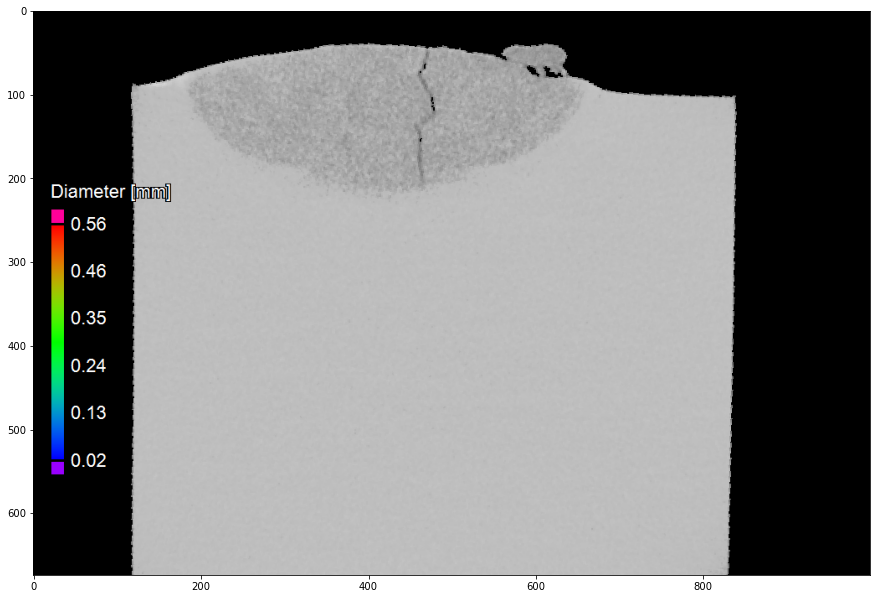

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [91]:
img_array.shape

(674, 1000, 3)

### stacked convolutional auto-encoder

In [97]:
from torch import nn

In [102]:
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(16, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        
        self.dncoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=3),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),
            nn.Tanh()
        )
        
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return decode